# Information Retrieval in High Dimensional Data

# Assignment #1, 03.11.2017

# Curse of Dimensionality
Group Number: G10

Group Members:
- Achtner Martin
- Arifi Ridon
- Ehrhardt Daniel
- Fichtner Lukas
- Hassis Rafif

## Task 1
Assume $X$ to be uniformly distributed in $C_1$

Determine d in dependence of p: $(X \in C_d) = q$ with $q \in [0, 1]$


$p$: Dimensionality of the hypercube

$d$: Edge length of the hypercube

$q$: Arbitrary probability between $0$ and $1$




$\rightarrow$ The probability of $X$ lying in $C_d$ can be expressed as the relation between their corresponding "volumes":

\begin{equation} P(X \in C_d) = q = \frac{d^p}{1^p} = d^p \end{equation}

\begin{equation} d = \sqrt[p]{q} \end{equation}

Let the components of the p-dimensional random variable $X^p$ be independent and
have the standard normal distribution. It is known that $P( | X^1 | \leqslant 2.576) = 0.99$.
For an arbitrary $p$, determine the probability $P(X^p \notin C_{5.152})$ for any of the
components of $X^p$ to lie outside of the interval $[-2.576, 2.576]$.



\begin{equation} P = P( | X^p | \leqslant 2.576)^p \end{equation}

### Evaluate the value for $p = 2$, $p = 3$ and $p = 500$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
p_values = (2, 3, 500)

Px = np.asarray([1 - 0.99**i for i in p_values])
for i in range(3):
    print('Px[{}] = {:.3f}'.format(p_values[i], Px[i]))

Px[2] = 0.020
Px[3] = 0.030
Px[500] = 0.993


## Task 2

### Sample 100 uniformly distributed random vectors from the hypercube $[-1, 1]^p$ for $p = 2$.

In [18]:
samples = np.random.uniform(low=-1.0, high=1.0, size=(2, 100))

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print('{}'.format(samples) )

[[0.964 0.598 0.367 -0.816 0.701 0.582 -0.539 0.192 -0.931 -0.907 0.459
  -0.369 0.976 0.616 -0.359 -0.000 0.184 0.003 -0.787 -0.472 0.894 -0.051
  -0.783 -0.783 0.315 -0.327 -0.819 0.257 -0.459 -0.196 0.139 0.565 -0.066
  0.647 0.658 0.180 -0.639 -0.603 0.655 0.389 -0.244 -0.983 0.913 -0.038
  0.118 -0.826 0.885 0.186 -0.884 -0.790 0.968 -0.513 0.873 -0.193 -0.071
  0.327 -0.938 0.293 0.812 0.810 -0.098 0.376 0.933 0.585 0.063 -0.931
  -0.216 0.653 -0.443 0.657 0.535 0.371 -0.163 0.413 0.028 0.322 0.385
  -0.035 0.871 0.020 0.583 0.102 -0.857 -0.576 -0.779 0.307 -0.298 0.022
  -0.928 -0.420 0.648 -0.577 -0.179 0.900 -0.209 -0.636 -0.952 0.975 0.404
  -0.615]
 [0.880 0.655 -0.006 -0.946 -0.261 0.906 0.557 0.502 0.207 -0.861 0.835
  0.272 -0.020 0.536 -0.610 -0.582 -0.641 -0.982 0.639 0.469 0.120 0.305
  -0.184 0.038 0.225 -0.722 -0.288 0.015 0.222 -0.189 0.877 -0.339 -0.879
  -0.515 0.175 0.487 0.444 0.788 0.134 0.138 -0.426 -0.479 0.901 -0.209
  -0.044 0.853 -0.123 0.546 0.172 -0.266 

### For each of the 100 vectors determine the minimum angle to all other vectors. Then compute the average of these minimum angles.

In [19]:
%%time
min_angles = np.zeros((samples.shape[1]))

for i in range(samples.shape[1]):
    indices = [j for j in range(samples.shape[1]) if not j==i]
    angles = np.zeros(0)
    x = samples[:, i]
    for j in indices:
        y = samples[:, j]
        cosine = np.dot(x,y) / (np.linalg.norm(x) * np.linalg.norm(y))
        angles = np.append(angles, np.arccos(cosine))
    min_angles[i] = np.amin(angles)
        
print('Average minimum angle = ', np.mean(min_angles))

Average minimum angle =  0.0295040143848
CPU times: user 248 ms, sys: 0 ns, total: 248 ms
Wall time: 251 ms


### Repeat the above for dimensions p = 1...1000 and use the results to plot the average minimum angle against the dimension.

In [20]:
%%time

N_DIMENSIONS = 1000
SAMPLESIZE = 100
min_angles = np.zeros(SAMPLESIZE)
max_angles = np.zeros(SAMPLESIZE)
min_avg_angles = np.zeros(N_DIMENSIONS)
max_avg_angles = np.zeros(N_DIMENSIONS)

samples = np.random.uniform(low=-1.0, high=1.0, size=(N_DIMENSIONS, SAMPLESIZE))
for p in range(1, N_DIMENSIONS+1):    
    for i in range(SAMPLESIZE):
        indices = [j for j in range(SAMPLESIZE) if not i==j]
        x = samples[:, i]
        angles = np.zeros(0)
        for j in indices:
            y = samples[:, j]
            cosine = np.dot(x,y) / (np.linalg.norm(x) * np.linalg.norm(y))
            angles = np.append(angles, np.arccos(cosine))
        min_angles[i] = np.amin(angles)
        max_angles[i] = np.amax(angles)    
    min_avg_angles[N_DIMENSIONS-p] = np.mean(min_angles)
    max_avg_angles[N_DIMENSIONS-p] = np.mean(max_angles)
    samples = np.delete(samples, np.s_[-1:], axis=0)

CPU times: user 4min 2s, sys: 0 ns, total: 4min 2s
Wall time: 4min 2s


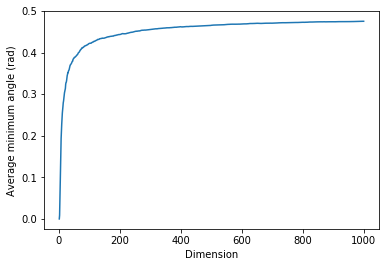

In [21]:
plt.plot(range(1,N_DIMENSIONS+1), min_avg_angles/np.pi)
plt.ylabel('Average minimum angle (rad)')
plt.xlabel('Dimension')
plt.show()

### Give an interpretation of the result.

$\rightarrow$ The average angle between 2 vectors converges to $\frac{\pi}{2}$

### What conclusions can you draw for 2 randomly sampled vectors in a p-dimensional space?

$\rightarrow$ The higher the value of p, the more likely it is that the 2 vectors are orthogonal.

### Does the result change if the sample size increases?

In [23]:
%%time

N_DIMENSIONS = 1000
SAMPLESIZE = 200
min_angles = np.zeros(SAMPLESIZE)
max_angles = np.zeros(SAMPLESIZE)
min_avg_angles = np.zeros(N_DIMENSIONS)
max_avg_angles = np.zeros(N_DIMENSIONS)

samples = np.random.uniform(low=-1.0, high=1.0, size=(N_DIMENSIONS, SAMPLESIZE))
for p in range(1, N_DIMENSIONS+1):    
    for i in range(SAMPLESIZE):
        indices = [j for j in range(SAMPLESIZE) if not i==j]
        x = samples[:, i]
        angles = np.zeros(0)
        for j in indices:
            y = samples[:, j]
            cosine = np.dot(x,y) / (np.linalg.norm(x) * np.linalg.norm(y))
            angles = np.append(angles, np.arccos(cosine))
        min_angles[i] = np.amin(angles)
        max_angles[i] = np.amax(angles)    
    min_avg_angles[N_DIMENSIONS-p] = np.mean(min_angles)
    max_avg_angles[N_DIMENSIONS-p] = np.mean(max_angles)
    samples = np.delete(samples, np.s_[-1:], axis=0)

CPU times: user 16min 34s, sys: 252 ms, total: 16min 34s
Wall time: 16min 34s


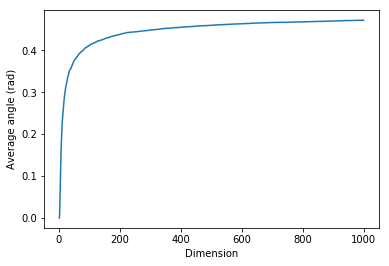

In [24]:
plt.plot(range(1,N_DIMENSIONS+1), min_avg_angles/np.pi)
plt.ylabel('Average angle (rad)')
plt.xlabel('Dimension')
plt.show()

$\rightarrow$ The more samples are chosen in a space of dimension $p$ the more likely it is that 2 vectors point in the same direction. Hence the average angle converges slower and with more oscillations around $\frac{\pi}{2}$.

## Task 3

Draw a circle with radius $\frac{1}{2}$ around each corner (note that each circle touches its two neighboring circles). Now draw a circle around the origin with a radius such that it touches all of the four previously drawn circles. What radius does it have?



$$
\rightarrow r = \sqrt{0.5^2 + 0.5^2} - R = \sqrt{0.5^2 + 0.5^2} - 0.5 = \sqrt{0.25 + 0.25} -0.5 = \sqrt{0.5} - 0.5 = 0.207106... \approx 0.207
$$

Motivate your claim.

$\rightarrow$The distance from the center 0 to one of the corner points of the hypercube can be calculated using the Theorem of Pythagoras.

In [26]:
def calculate_radius(d, p):
    return np.sqrt(np.sum(np.asarray([d**2 for i in range(p)]))) - 0.5

dimensions = np.asarray(range(1,21))
result = np.zeros((20,))

for p in dimensions:
    result[p-1] = calculate_radius(0.5, p)
    print('p = ' + str(p) + ', r = ' + str(result[p-1]))

p = 1, r = 0.0
p = 2, r = 0.207106781187
p = 3, r = 0.366025403784
p = 4, r = 0.5
p = 5, r = 0.61803398875
p = 6, r = 0.724744871392
p = 7, r = 0.822875655532
p = 8, r = 0.914213562373
p = 9, r = 1.0
p = 10, r = 1.08113883008
p = 11, r = 1.15831239518
p = 12, r = 1.23205080757
p = 13, r = 1.30277563773
p = 14, r = 1.37082869339
p = 15, r = 1.4364916731
p = 16, r = 1.5
p = 17, r = 1.56155281281
p = 18, r = 1.62132034356
p = 19, r = 1.67944947177
p = 20, r = 1.7360679775


$\rightarrow$ From the 4th dimension onwards the radius of the inner hypersphere exceeds the boundaries of the hypercube.

$\rightarrow$ From the 9th dimension onwards the radius of the inner hypersphere is equal or more than the size of the hypercube.

## Statistical Decision Making

## Task 4
Answer the following question. All answers must be justified.

<div style="text-align: center">$\begin{array}{c|ccc} p_X(X, Y)  & Y = 1 & Y = 2 & Y = 3 \\ \hline\hline X = 2 & 0.4 & 0.14 & 0.05 \\ X = 1 & 0.02 & 0.26 & 0.13\end{array}$</div>

+ The numbers in Figure 1 describe the probability of the respective events (e.g. $P(X=1, Y=1) = 0.02).$ Is this table a probability table? Justify your answer.

$ \rightarrow $ The individual probabilities of alle possible events must be real, non-negative and sum up to 1.

In [12]:
# Check sum of probabilties.
joint_prob = np.array([[0.4, 0.14, 0.05], [0.02, 0.26, 0.13]])
P_sum = np.sum(joint_prob)
print('Sum of all probabilities: {}'.format(P_sum))

Sum of all probabilities: 1.0


In [13]:
negative = False
arr = joint_prob.reshape(6,1)
for prob in arr:
    if prob < 0:
        negative = True
print('Is any probability negative?: {}'.format(negative))

Is any probability negative?: False


So the answer ist yes, this table is a probability table.

+ By means of Figure 1, provide the conditional expectation $\mathbb{E}_{y|X=2}[Y]$ and the probability of the event $X=1$ under the condition that $Y=3.$

$ \rightarrow $ To calculate $\mathbb{E}_{y|X=2}[Y]$ we simply have to multiply the possible outcomes of $Y$ with their respective joint probabilities, add them up and divide them by the probybility that $X$ equals two.
$\mathbb{E}_{y|X=2}[Y] = \frac{\sum\limits_{i=1}^3 i \times P(X=1, Y=i)}{P(X=2)}$

In [28]:
y_values = np.array([1,2,3])
E_y_x2 = np.dot(joint_prob[0], y_values)/np.sum(joint_prob[0])
print('Conditional Expectation: {:.2f}'.format(E_y_x2))

Conditional Expectation: 1.41


$ \rightarrow $ Similiar formula for the second probability:
$ P(X=1|Y=3) = \frac{P(X=1,Y=3)}{P(Y=3)} = \frac{P(X=1,Y=3)}{\sum\limits_{i=1}^2 P(X=i,Y=3)} $

In [29]:
P_x1_cond_y3 = joint_prob[1,2]/(joint_prob[0,2]+joint_prob[1,2])
print('Conditional Probability: {:.2f}'.format(P_x1_cond_y3))

Conditional Probability: 0.72


+ Is the function $p(x,y)$ given by

\begin{equation} p(x,y) = \begin{cases} 1 & \text{for } 0 \leq x \leq 1 \text{, } 0\leq y \leq \frac{1}{2} \\0 & \text{otherwise}\end{cases} \end{equation}

a joint densitiy function for two random variables?

$ \rightarrow $ For this function to be a joint density function it must fulfill the property:

\begin{equation} \int\limits_{-\infty}^{\infty}\int\limits_{-\infty}^{\infty}p(x,y)dxdy = 1 \end{equation}

and regarding our function we can change this condition to

\begin{equation} \int\limits_{0}^{0.5}\int\limits_{0}^{1}1 dxdy = 1 \end{equation}

$ \int\limits_{0}^{\frac{1}{2}}\int\limits_{0}^{1}1 dxdy = \int\limits_{0}^{\frac{1}{2}}\left[x\right]_0^1dy = \int\limits_{0}^{\frac{1}{2}}1dy = \left[y\right]_0^{\frac{1}{2}} = \frac{1}{2} \neq 1$

Therefore this function is not a joint density function.

In [2]:
# Validate Integral
from sympy import *
init_printing(use_unicode=True)
x, y = symbols('x y')
integrate(integrate(1, (x, 0, 1)), (y, 0, Rational(1, 2)))

+ For two random variables $X$ and $Y$, let the joint density function be given by

\begin{equation} p(x,y) = \begin{cases} 2e^{-(x+y)} & \text{for } 0 \leq x \leq y \text{, } 0\leq y \\0 & \text{otherwise.}\end{cases} \end{equation}

What are the marginal density functions for $X$ and $Y$ respectively?

$ \rightarrow $ The marginal density functions are defined as

$ f_x(x,y) = \int\limits_{-\infty}^{+\infty}f(x,y)dy$

   $ f_y(x,y) = \int\limits_{-\infty}^{+\infty}f(x,y)dx$ 

Compute $ f_x(x,y) $ first:

$ f_x(x,y) = \int\limits_{0}^{+\infty}2e^{-(x+y)}dy = \lim\limits_{\alpha \to \infty} \int\limits_{0}^{\alpha}2e^{-(x+y)}dy = \lim\limits_{\alpha \to \infty} \left[-2e^{-(x+y)}\right]_0^{\alpha} = \lim\limits_{\alpha \to \infty} \left.\left[-2(e^{-(x + \alpha)} - e^{-(x+0)})\right]\right|_{x\geq0} = 2e^{-x}$

Now for $ f_y(x,y) $:

$ f_y(x,y) = \int\limits_0^y 2e^{-(x+y)}dx = \left[-2e^{-(x+y)}\right]_0^y = -2e^{-2y} + 2e^{-y} $

In [31]:
# Validate f_x(x, y)
fxy = 2*exp(-(x+y))
integrate(fxy, (y, 0, oo))

In [32]:
# Validate f_y(x, y)
integrate(fxy, (x, 0, y))

+ Let the joint density function of two random variables $X$ and $Y$ be given by

\begin{equation} p(x,y) = \begin{cases} \frac{1}{15}(2x+4y) & \text{for } 0 < x < 3 \text{, } 0 < y < 1 \\0 & \text{otherwise.}\end{cases} \end{equation}

Determine the probability for $X \leq 2$ under the condition that $Y = \frac{1}{2}$.

$\rightarrow P(X \leq 2, Y=\frac{1}{2}) = \int\limits_0^2 \left.p(x,y)dx\right|_{y=\frac{1}{2}} = \int\limits_0^2 \frac{1}{15}(2x+2)dx = \left[\frac{1}{15}(x^2 + 2x)\right]_0^2 = \frac{1}{15}(4+4) -0 = \frac{8}{15}$

In [8]:
# Validate P(X <=2, Y = 0.5)
pxy = Rational(1, 15)*(2*x + 4*y)
prob = integrate(pxy, (x, 0, 2))
y = Rational(1, 2)
prob